In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv('fraudTest.csv', index_col=0)
pd.set_option('display.max_columns', False)

In [3]:
raw_data

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,63453,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [4]:
raw_data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [5]:
data = raw_data.drop(['cc_num', 'first', 'last', 'street', 'city', 'zip', 'trans_num', 'unix_time', 'job'], axis=1)

In [6]:
data

,trans_date_trans_time,merchant,category,amt,gender,state,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,fraud_Kirlin and Sons,personal_care,2.86,M,SC,33.9659,-80.9355,333497,1968-03-19,33.986391,-81.200714,0
1,2020-06-21 12:14:33,fraud_Sporer-Keebler,personal_care,29.84,F,UT,40.3207,-110.4360,302,1990-01-17,39.450498,-109.960431,0
2,2020-06-21 12:14:53,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,NY,40.6729,-73.5365,34496,1970-10-21,40.495810,-74.196111,0
3,2020-06-21 12:15:15,fraud_Haley Group,misc_pos,60.05,M,FL,28.5697,-80.8191,54767,1987-07-25,28.812398,-80.883061,0
4,2020-06-21 12:15:17,fraud_Johnston-Casper,travel,3.19,M,MI,44.2529,-85.0170,1126,1955-07-06,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,fraud_Reilly and Sons,health_fitness,43.77,M,MO,40.4931,-91.8912,519,1966-02-13,39.946837,-91.333331,0
555715,2020-12-31 23:59:09,fraud_Hoppe-Parisian,kids_pets,111.84,M,TX,29.0393,-95.4401,28739,1999-12-27,29.661049,-96.186633,0
555716,2020-12-31 23:59:15,fraud_Rau-Robel,kids_pets,86.88,F,WA,46.1966,-118.9017,3684,1981-11-29,46.658340,-119.715054,0
555717,2020-12-31 23:59:24,fraud_Breitenberg LLC,travel,7.99,M,ID,44.6255,-116.4493,129,1965-12-15,44.470525,-117.080888,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   merchant               555719 non-null  object 
 2   category               555719 non-null  object 
 3   amt                    555719 non-null  float64
 4   gender                 555719 non-null  object 
 5   state                  555719 non-null  object 
 6   lat                    555719 non-null  float64
 7   long                   555719 non-null  float64
 8   city_pop               555719 non-null  int64  
 9   dob                    555719 non-null  object 
 10  merch_lat              555719 non-null  float64
 11  merch_long             555719 non-null  float64
 12  is_fraud               555719 non-null  int64  
dtypes: float64(5), int64(2), object(6)
memory usage: 59.4+ MB


Text(0.5, 1.02, 'Count of Fraud per Category')

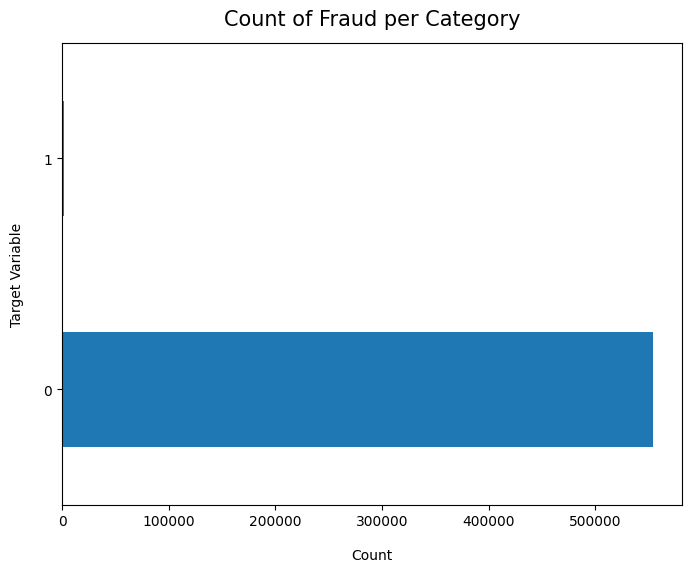

In [9]:
raw_data['is_fraud'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel('Count', labelpad=14, fontsize = 10)
plt.ylabel('Target Variable', labelpad=14, fontsize=10)
plt.title('Count of Fraud per Category', y=1.02, fontsize=15)

Super Imbalanced dataset

## Trans_date_trans_time

In [38]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   merchant               555719 non-null  object        
 2   category               555719 non-null  object        
 3   amt                    555719 non-null  float64       
 4   gender                 555719 non-null  object        
 5   state                  555719 non-null  object        
 6   lat                    555719 non-null  float64       
 7   long                   555719 non-null  float64       
 8   city_pop               555719 non-null  int64         
 9   dob                    555719 non-null  object        
 10  merch_lat              555719 non-null  float64       
 11  merch_long             555719 non-null  float64       
 12  is_fraud               555719 non-null  int6

In [40]:
data['dob'] = pd.to_datetime(data['dob'])

In [41]:
data['merchant'] = data['merchant'].str.replace('fraud_', '')

In [42]:
data['merchant'].values

array(['Kirlin and Sons', 'Sporer-Keebler',
       'Swaniawski, Nitzsche and Welch', ..., 'Rau-Robel',
       'Breitenberg LLC', 'Dare-Marvin'], dtype=object)

In [43]:
data['merchant'].value_counts()

Kilback LLC                        1859
Cormier LLC                        1597
Schumm PLC                         1561
Kuhn LLC                           1521
Dickinson Ltd                      1519
                                   ... 
Treutel-King                        323
Satterfield-Lowe                    319
Kessler Group                       318
Jerde-Hermann                       312
Ritchie, Bradtke and Stiedemann     304
Name: merchant, Length: 693, dtype: int64

In [44]:
data['merchant'] = data['merchant'].str.replace(' LLC', '')

In [45]:
data['merchant'] = data['merchant'].str.replace(' PLC', '')

In [46]:
data['merchant'] = data['merchant'].str.replace(' Ltd', '')

In [47]:
data['merchant'] = data['merchant'].str.replace(',', '')

In [48]:
data['merchant'] = data['merchant'].str.replace(' and ', ' ')

In [49]:
data['merchant'] = data['merchant'].str.replace(' inc', '')

In [50]:
data['merchant'] = data['merchant'].str.replace(' Inc', '')

In [51]:
data['merchant'] = data['merchant'].str.replace(' Group', '')

In [52]:
data['merchant'].value_counts()

Kilback                       2625
Wilkinson                     2589
Kuhn                          2316
Botsford                      2020
Barton                        2013
                              ... 
Douglas DuBuque McKenzie       326
Treutel-King                   323
Satterfield-Lowe               319
Jerde-Hermann                  312
Ritchie Bradtke Stiedemann     304
Name: merchant, Length: 662, dtype: int64

In [53]:
data['merchant'].unique()

array(['Kirlin Sons', 'Sporer-Keebler', 'Swaniawski Nitzsche Welch',
       'Haley', 'Johnston-Casper', 'Daugherty', 'Romaguera', 'Reichel',
       'Goyette Howell Collier', 'Kilback', 'Feil Hilpert Koss',
       'Gottlieb', 'Connelly-Carter', 'Bechtelar-Rippin',
       'Lubowitz-Walter', 'Welch Rath Koepp', 'Hickle',
       'Lang Towne Schuppe', 'Morissette', 'Prosacco', 'Corwin-Romaguera',
       'Tillman', 'Veum-Koelpin', 'Watsica Haag Considine',
       'Leannon-Ward', 'Hintz Bauch Smith', 'Labadie',
       'Eichmann Hayes Treutel', 'Leffler-Goldner', 'Kautzer Sons',
       'Ernser-Feest', 'Zemlak Tillman Cremin', 'Nienow', 'Lynch-Wisozk',
       'Schiller', 'Hoppe-Parisian', 'Brown-Greenholt', 'Reilly',
       'Moore Williamson Emmerich', 'Rau-Robel', 'Fadel Mertz Rippin',
       'Crona Sons', 'Bahringer Bergnaum Quitzon',
       'Koss Hansen Lueilwitz', 'Yost Schamberger Windler',
       'Armstrong Walter Gottlieb', 'Friesen', 'Champlin Sons',
       'Bins-Tillman', 'Douglas-Whit

In [54]:
data['merchant_count'] = data['merchant'].apply(lambda x: len(str(x).split(' ')))

In [55]:
data = data.drop(['merchant'], axis=1)

In [56]:
data

,trans_date_trans_time,category,amt,gender,state,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,merchant_count
0,2020-06-21 12:14:25,personal_care,2.86,M,SC,33.9659,-80.9355,333497,1968-03-19,33.986391,-81.200714,0,2
1,2020-06-21 12:14:33,personal_care,29.84,F,UT,40.3207,-110.4360,302,1990-01-17,39.450498,-109.960431,0,1
2,2020-06-21 12:14:53,health_fitness,41.28,F,NY,40.6729,-73.5365,34496,1970-10-21,40.495810,-74.196111,0,3
3,2020-06-21 12:15:15,misc_pos,60.05,M,FL,28.5697,-80.8191,54767,1987-07-25,28.812398,-80.883061,0,1
4,2020-06-21 12:15:17,travel,3.19,M,MI,44.2529,-85.0170,1126,1955-07-06,44.959148,-85.884734,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,health_fitness,43.77,M,MO,40.4931,-91.8912,519,1966-02-13,39.946837,-91.333331,0,2
555715,2020-12-31 23:59:09,kids_pets,111.84,M,TX,29.0393,-95.4401,28739,1999-12-27,29.661049,-96.186633,0,1
555716,2020-12-31 23:59:15,kids_pets,86.88,F,WA,46.1966,-118.9017,3684,1981-11-29,46.658340,-119.715054,0,1
555717,2020-12-31 23:59:24,travel,7.99,M,ID,44.6255,-116.4493,129,1965-12-15,44.470525,-117.080888,0,1


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   category               555719 non-null  object        
 2   amt                    555719 non-null  float64       
 3   gender                 555719 non-null  object        
 4   state                  555719 non-null  object        
 5   lat                    555719 non-null  float64       
 6   long                   555719 non-null  float64       
 7   city_pop               555719 non-null  int64         
 8   dob                    555719 non-null  datetime64[ns]
 9   merch_lat              555719 non-null  float64       
 10  merch_long             555719 non-null  float64       
 11  is_fraud               555719 non-null  int64         
 12  merchant_count         555719 non-null  int6

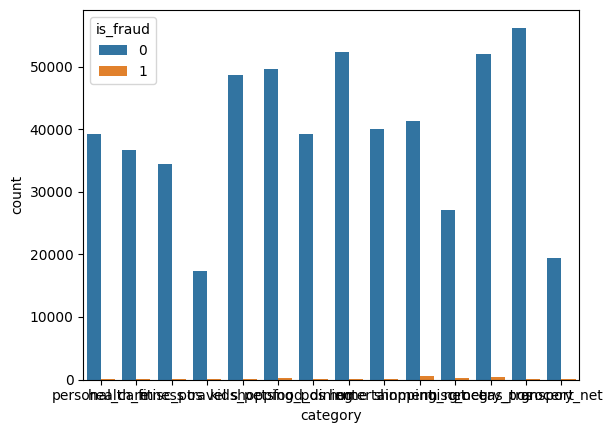

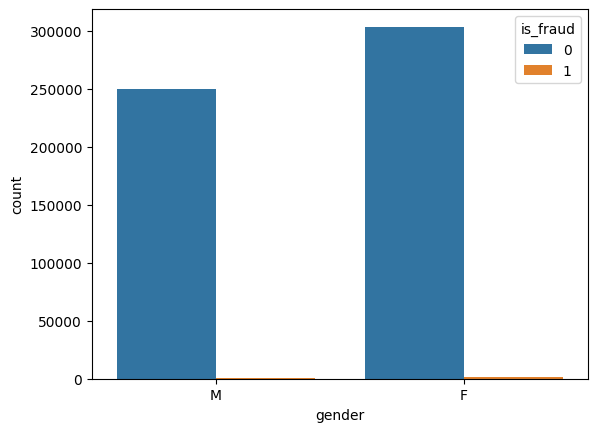

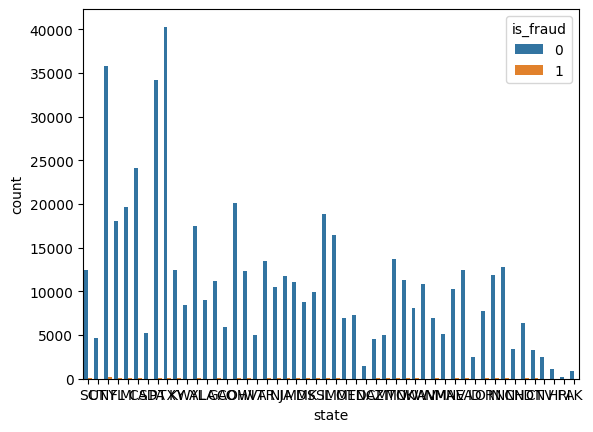

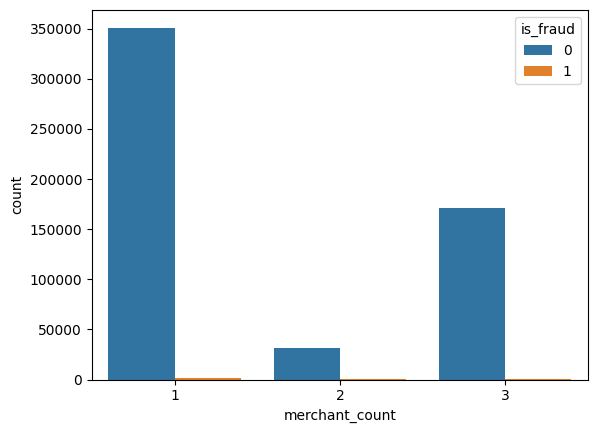

In [58]:
for i, predictor in enumerate(data.drop(['is_fraud', 'trans_date_trans_time', 'amt', 'city_pop', 'dob', 'lat', 'long', 'merch_lat', 'merch_long'], axis=1)):
    plt.figure(i)
    sns.countplot(data=data, x=predictor, hue='is_fraud')

C:\Users\itski\AppData\Local\Temp\ipykernel_16668\3512824694.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(data.amt[(data["is_fraud"] == 0) ],
C:\Users\itski\AppData\Local\Temp\ipykernel_16668\3512824694.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(data.amt[(data["is_fraud"] == 1) ],


Text(0.5, 1.0, 'Amount by Fraud')

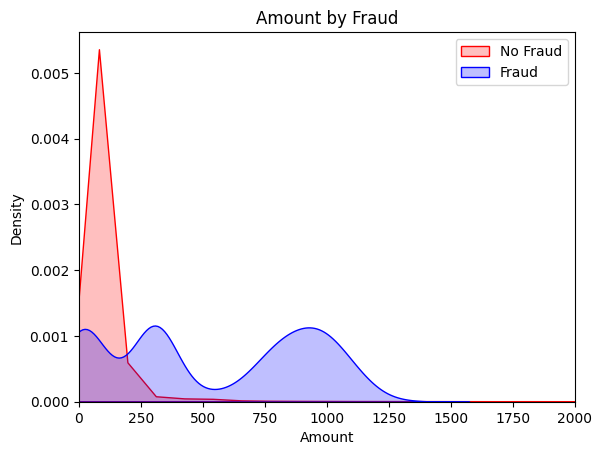

In [59]:
Mth = sns.kdeplot(data.amt[(data["is_fraud"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(data.amt[(data["is_fraud"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Fraud","Fraud"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Amount')
Mth.set_xlim(0, 2000)
Mth.set_title('Amount by Fraud')

In [60]:
fraud_data_dummies = pd.get_dummies(data, drop_first= True)
fraud_data_dummies

,trans_date_trans_time,amt,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,merchant_count,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,2020-06-21 12:14:25,2.86,33.9659,-80.9355,333497,1968-03-19,33.986391,-81.200714,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2020-06-21 12:14:33,29.84,40.3207,-110.4360,302,1990-01-17,39.450498,-109.960431,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2020-06-21 12:14:53,41.28,40.6729,-73.5365,34496,1970-10-21,40.495810,-74.196111,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-06-21 12:15:15,60.05,28.5697,-80.8191,54767,1987-07-25,28.812398,-80.883061,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-06-21 12:15:17,3.19,44.2529,-85.0170,1126,1955-07-06,44.959148,-85.884734,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,43.77,40.4931,-91.8912,519,1966-02-13,39.946837,-91.333331,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
555715,2020-12-31 23:59:09,111.84,29.0393,-95.4401,28739,1999-12-27,29.661049,-96.186633,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
555716,2020-12-31 23:59:15,86.88,46.1966,-118.9017,3684,1981-11-29,46.658340,-119.715054,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
555717,2020-12-31 23:59:24,7.99,44.6255,-116.4493,129,1965-12-15,44.470525,-117.080888,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


C:\Users\itski\AppData\Local\Temp\ipykernel_16668\1556267879.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fraud_data_dummies.corr()['is_fraud'].sort_values(ascending = False).plot(kind='bar')


<AxesSubplot: >

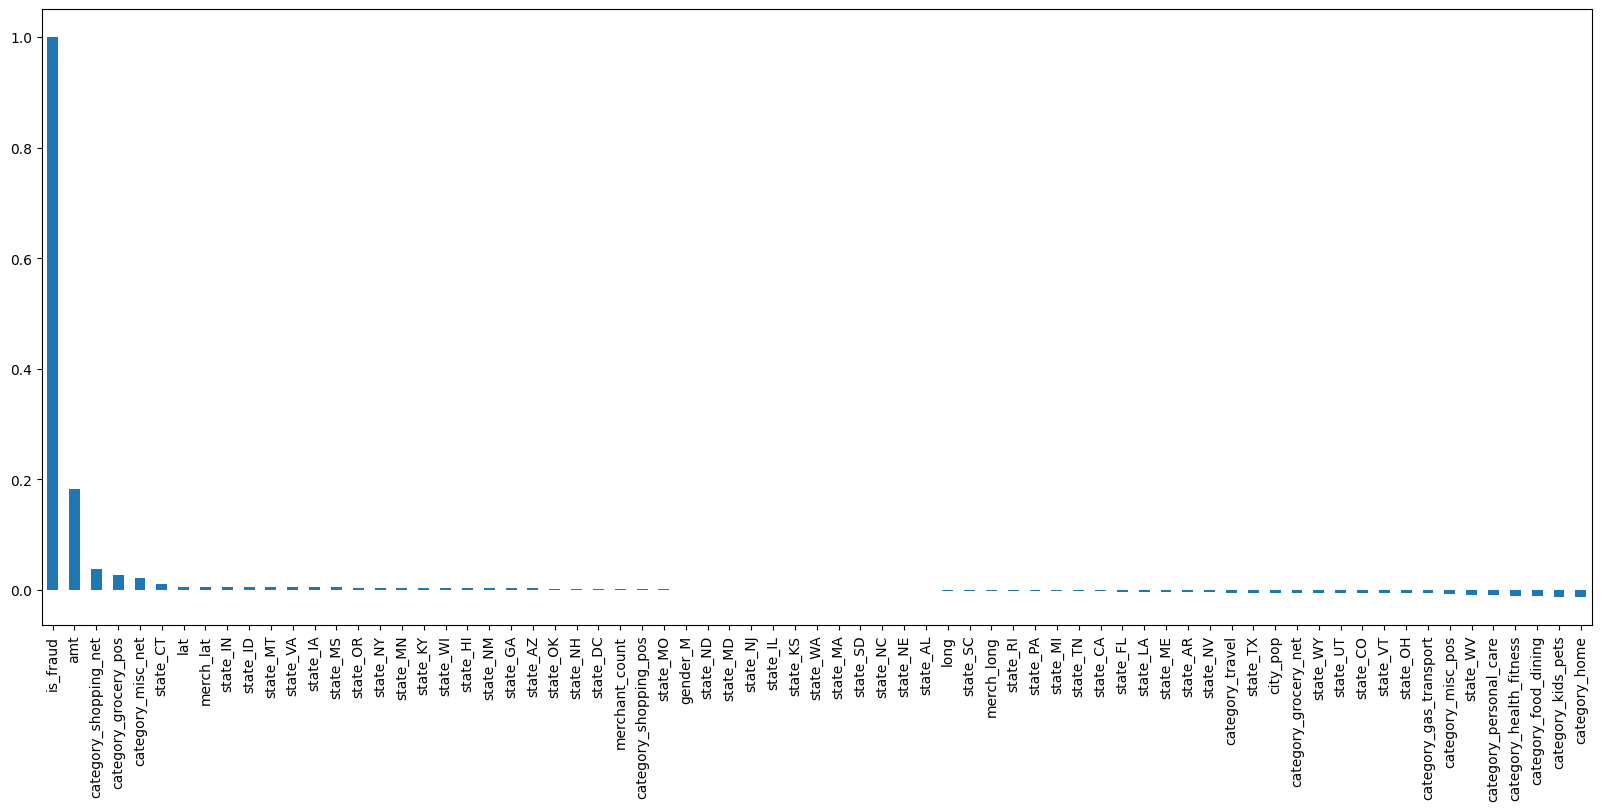

In [61]:
plt.figure(figsize=(20,8))
fraud_data_dummies.corr()['is_fraud'].sort_values(ascending = False).plot(kind='bar')

C:\Users\itski\AppData\Local\Temp\ipykernel_16668\105424491.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(fraud_data_dummies.corr(), cmap='coolwarm')


<AxesSubplot: >

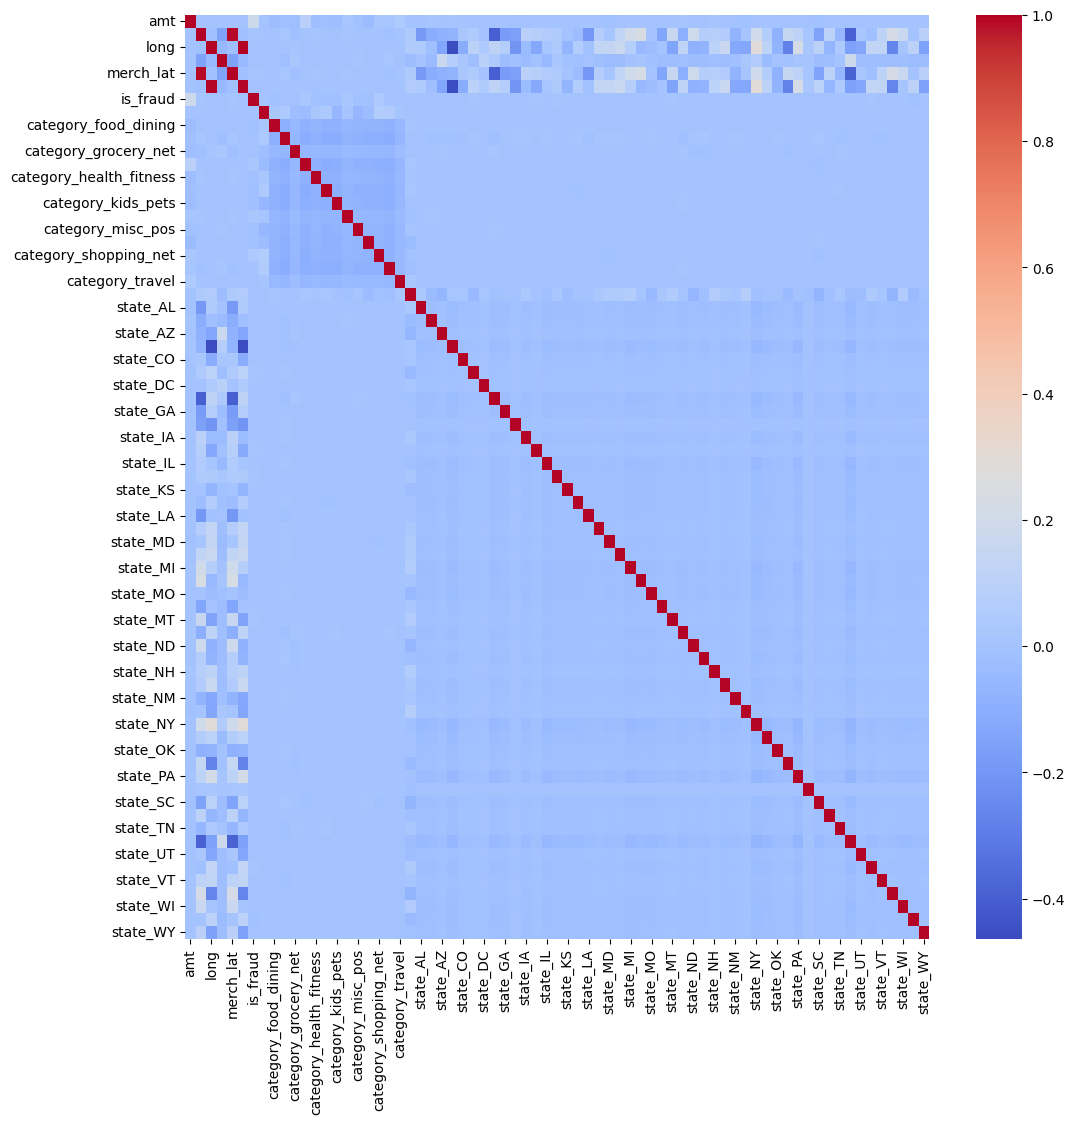

In [62]:
plt.figure(figsize=(12,12))
sns.heatmap(fraud_data_dummies.corr(), cmap='coolwarm')

In [68]:
fraud_data_dummies.to_csv('fraud_data.csv')

Purchase Amount seems to be the most important factor. 

Everything else seems to just be coincidence. 